# 6.7 Lab 3: PLS Regression



<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#6.7.2-Partial-Least-Squares">Partial Least Squares</a></li>
    </ol>
</div>


In [28]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

Before we run the PLS regression we start with data preparation. Just like in previous Labs for Chapter 6 we'll be using **Hitters** data set and the procedure is the copy of previous data preparation.

> You can download **Hitters** data set for from **[here.](https://drive.google.com/file/d/1e2NqNJGkCTAGBee8JHGNGCJHplG5R2YQ/view?usp=sharing)**


In [2]:
hitters = pd.read_csv('Hitters.csv')
hitters = hitters.dropna(axis=0)

In [4]:
X = hitters.loc[:, hitters.columns != 'Salary']
y = hitters['Salary']

In [5]:
def get_index(df):
    col_index = {}
    column = df.columns
    for col in column:
        col_index[col] = df.columns.get_loc(col)
    return col_index

In [6]:
column_index = get_index(X)
print(column_index)

{'AtBat': 0, 'Hits': 1, 'HmRun': 2, 'Runs': 3, 'RBI': 4, 'Walks': 5, 'Years': 6, 'CAtBat': 7, 'CHits': 8, 'CHmRun': 9, 'CRuns': 10, 'CRBI': 11, 'CWalks': 12, 'League': 13, 'Division': 14, 'PutOuts': 15, 'Assists': 16, 'Errors': 17, 'NewLeague': 18}


In [7]:
def label_encoder(df, index):
    """
    We will covnert categorical values into the dummies
    using LabelEncoder from scikit-learn

    """
    le = LabelEncoder()
    for c in index:
        df.iloc[:, c] = le.fit_transform(df.iloc[:, c])
    return df

In [10]:
X = label_encoder(X, [13, 14, 18]) # running previously defined function will turn categorical variables into dummies

F:\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


## _6.7.2 Partial Least Squares_

We implement partial least squares (PLS) using the `PLSRegression` function, also in the `sklearn` library. We will run several models using k-Fold. 

In [14]:
# Split into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [38]:
def pls_kfold(X, y, k):
    
    kf = KFold(n_splits=k, shuffle=True, random_state=1)
    pls_mse = []

    for i in np.arange(1, 20):
        pls = PLSRegression(n_components=i)
        score = cross_val_score(pls, scale(X), y,
                                                 cv=kf, scoring='neg_mean_squared_error').mean()
        pls_mse.append(-score)
    return pls_mse

(-1, 19.9)

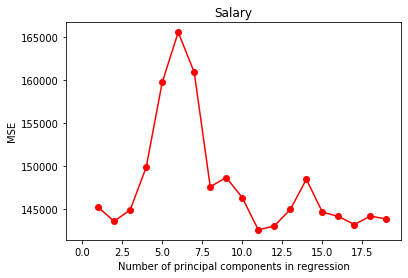

In [39]:
# Plot results
plt.plot(np.arange(1, 20), np.array(pls_kfold(X_train, y_train, 10)), '-o', color='r')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1)

The lowest cross-validation error occurs when only $M = 2$ partial least squares dimensions are used. We now evaluate the corresponding test set MSE:

In [45]:
pls = PLSRegression(n_components=2)
pls.fit(scale(X_train), y_train)

print('MSE: ', mean_squared_error(y_test, pls.predict(scale(X_test))))

MSE:  104838.51042760801


The test MSE is comparable to, but slightly higher than, the test MSE obtained using ridge regression and the lasso.

Finally, we perform PLS using the full data set, using M = 2, the number of components identified by cross-validation.

In [51]:
pls = PLSRegression(n_components=2)
pls.fit(scale(X), y)

print('MSE: ', mean_squared_error(y, pls.predict(scale(X))))

MSE:  108660.36160213721
